In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/processed_classified_data_clean.csv')

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WTT,1000.0,0.949682,0.289635,0.174412,0.742358,0.940475,1.163295,1.721779
PTI,1000.0,1.114303,0.257085,0.441398,0.942071,1.118486,1.307904,1.833757
EQW,1000.0,0.834127,0.291554,0.170924,0.615451,0.813264,1.028340,1.722725
SBI,1000.0,0.682099,0.229645,0.045027,0.515010,0.676835,0.834317,1.634884
LQE,1000.0,1.032336,0.243413,0.315307,0.870855,1.035824,1.198270,1.650050
QWG,1000.0,0.943534,0.256121,0.262389,0.761064,0.941502,1.123060,1.666902
FDJ,1000.0,0.963422,0.255118,0.295228,0.784407,0.945333,1.134852,1.713342
PJF,1000.0,1.071960,0.288982,0.299476,0.866306,1.065500,1.283156,1.785420
HQE,1000.0,1.158251,0.293738,0.365157,0.934340,1.165556,1.383173,1.885690
NXJ,1000.0,1.362725,0.204225,0.639693,1.222623,1.375368,1.504832,1.893950


In [8]:
df.isnull().sum()

,0
WTT,0
PTI,0
EQW,0
SBI,0
LQE,0
QWG,0
FDJ,0
PJF,0
HQE,0
NXJ,0


In [18]:
df['TARGET CLASS'].value_counts()

,count
TARGET CLASS,
1,500
0,500


In [11]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
X_train.shape

(700, 10)

In [26]:
model = Sequential()

In [27]:
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
Early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[Early_stop], epochs=600)

Epoch 1/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7347 - val_loss: 0.6288
Epoch 2/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6753 - val_loss: 0.6035
Epoch 3/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6490 - val_loss: 0.5724
Epoch 4/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6201 - val_loss: 0.5316
Epoch 5/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5546 - val_loss: 0.4831
Epoch 6/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5629 - val_loss: 0.4412
Epoch 7/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5275 - val_loss: 0.3906
Epoch 8/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4899 - val_loss: 0.3394
Epoch 9/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4503 - val_loss: 0.2954
Epoch 10/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4196 - val_loss: 0.2542
Epoch 11/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4096 - val_loss: 0.2210
Epoch 12/600
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [31]:
model_loss = pd.DataFrame(model.history.history)

In [32]:
model_loss

,loss,val_loss
0,0.728311,0.628831
1,0.682974,0.603513
2,0.643045,0.572415
3,0.611678,0.531565
4,0.575035,0.483067
5,0.557771,0.441176
6,0.519536,0.390604
7,0.493261,0.339351
8,0.448444,0.295415
9,0.415599,0.254161


<Axes: >

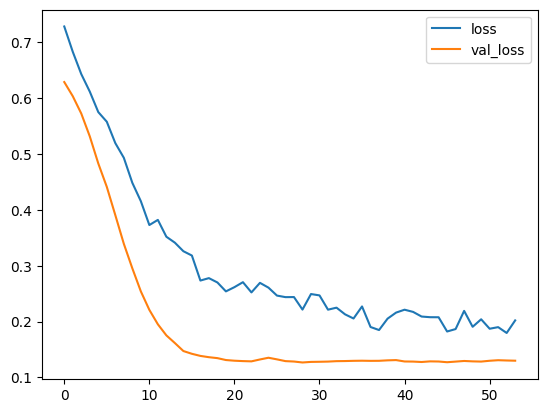

In [33]:
model_loss.plot()

In [34]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       159
           1       0.98      0.92      0.95       141

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [37]:
print(confusion_matrix(y_test, predictions))

[[156   3]
 [ 11 130]]


In [39]:
print(accuracy_score(y_test, predictions))

0.9533333333333334
